In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

file_path = '../../data/processed/feature_selected_data.parquet'
df = pd.read_parquet(file_path, engine= 'pyarrow')

In [ ]:
cols_grouped = ['anno', 'quadrimestre', 'regione_residenza']

In [ ]:
grouped = df.groupby(cols_grouped).size().reset_index(name='num_servizi')

In [ ]:
grouped.sort_values(by=['num_servizi'], ascending=True)

,anno,quadrimestre,tipologia_professionista_sanitario,tipologia_struttura_erogazione,descrizione_attivita,num_servizi
8192,2022,3,Ostetrica/o,Ente di Ricerca,Intervento di educazione e prevenzione in ambi...,1
2566,2020,1,Infermiere,Policlinico universitario privato,Valutazione della durata e della qualità del r...,1
2576,2020,1,Ostetrica/o,Ente di Ricerca,Intervento di educazione e prevenzione in ambi...,1
2584,2020,1,Podologo,Ente di Ricerca,Intervento di riabilitazione,1
2596,2020,1,Psicologo,Ente di Ricerca,Colloquio psicologico clinico,1
...,...,...,...,...,...,...
4376,2021,1,Fisioterapista,Ospedale a gestione diretta,Intervento fisioterapico,1060
3776,2020,4,Dietista,Ospedale a gestione diretta,Indagine alimentare (colloquio per rilevare ab...,1062
4301,2020,4,Psicologo,Ospedale a gestione diretta,Colloquio psicologico clinico,1083
3777,2020,4,Dietista,Ospedale a gestione diretta,Prestazione dietistica,1084


In [ ]:
df_cols_no_anno = cols_grouped.copy()
df_cols_no_anno.remove('anno')

In [ ]:
# Calcolo dell'incremento per ogni quadrimestre
grouped['incremento'] = grouped.groupby(df_cols_no_anno)['num_servizi'].diff()


In [ ]:
grouped.sort_values(by=['incremento'], ascending=False)

,anno,quadrimestre,tipologia_professionista_sanitario,tipologia_struttura_erogazione,descrizione_attivita,num_servizi,incremento
3777,2020,4,Dietista,Ospedale a gestione diretta,Prestazione dietistica,1084,637.0
3796,2020,4,Fisioterapista,Ospedale a gestione diretta,Intervento fisioterapico,1123,559.0
3778,2020,4,Dietista,Ospedale a gestione diretta,Valutazione dietetica e controllo dietoterapeu...,1013,552.0
3776,2020,4,Dietista,Ospedale a gestione diretta,Indagine alimentare (colloquio per rilevare ab...,1062,536.0
4267,2020,4,Logopedista,Ospedale a gestione diretta,Intervento logopedico,1038,534.0
...,...,...,...,...,...,...,...
7884,2022,3,Infermiere,Ente di Ricerca,Relazione di aiuto e sostegno psicologico,1,NaN
8231,2022,3,Tecnico Riabilitazione Psichiatrica,Ente di Ricerca,Intervento di riabilitazione,1,NaN
8419,2022,4,Infermiere,Ente di Ricerca,Attività educativa al paziente tracheotomizzat...,1,NaN
8421,2022,4,Infermiere,Ente di Ricerca,Educazione del famigliare e/o del paziente a v...,2,NaN


In [ ]:
# mask = (grouped['regione_erogazione'] == 'Sicilia') & (grouped['quadrimestre'] == 4)
# grouped[mask]

In [ ]:
# Elimino i campioni con incremento nullo, sono quelli del 2019 (primo anno storicizzato)
# grouped = grouped.dropna(subset=['incremento'])

In [ ]:

# Calcolo dell'incremento percentuale
grouped['incremento_percentuale'] = grouped['incremento'] / grouped.groupby(df_cols_no_anno)['num_servizi'].shift(1) * 100   # shift(1) per avere il valore precedente

# Calcolo dell'incremento percentuale medio per ogni coppia di quadrimestre e regione_erogazione
incremento_percentuale_medio = grouped.groupby(df_cols_no_anno)['incremento_percentuale'].mean().reset_index()

# Visualizza il risultato
app = incremento_percentuale_medio.sort_values(by=['incremento_percentuale'], ascending=False)
app

,quadrimestre,tipologia_professionista_sanitario,tipologia_struttura_erogazione,descrizione_attivita,incremento_percentuale
61,1,Infermiere,Azienda Ospedaliera,Educazione del paziente alla raccolta di espet...,1217.488739
535,1,Ostetrica/o,IRCCS privato,Intervento di educazione e prevenzione in ambi...,579.629630
248,1,Infermiere,Fondazione IRCCS,Informazioni sulle diverse modalità di rilevaz...,468.181818
17,1,Dietista,Fondazione IRCCS,Indagine alimentare (colloquio per rilevare ab...,451.648352
570,1,Psicologo,Policlinico universitario privato,Psicoterapia individuale,446.358543
...,...,...,...,...,...
1991,4,Infermiere,Ente di Ricerca,Supporto ed educazione alle medicazioni / bend...,NaN
1992,4,Infermiere,Ente di Ricerca,"Valutazione del livello di conoscenze, delle c...",NaN
1993,4,Infermiere,Ente di Ricerca,Valutazione della durata e della qualità del r...,NaN
2312,4,Podologo,Ente di Ricerca,Intervento di riabilitazione,NaN


In [ ]:
# mask = (grouped['regione_erogazione'] == 'Sicilia') & (grouped['quadrimestre'] == 4)
# grouped[mask]

In [ ]:
# mask = (incremento_percentuale_medio['regione_erogazione'] == 'Sicilia') & (incremento_percentuale_medio['quadrimestre'] == 4)
# incremento_percentuale_medio[mask]

Per studiare i dati e determinare le soglie appropriate per l'assegnazione delle etichette, puoi seguire alcuni passaggi che ti aiuteranno a comprendere meglio la distribuzione degli incrementi percentuali. Ecco una guida pratica su come fare:

1. Esplora la Distribuzione degli Incrementi Percentuali
Distribuzione: 
- Usa un istogramma o un grafico a densità per visualizzare la distribuzione degli incrementi percentuali.
- Statistica Descrittiva: Calcola metriche come la media, la mediana, i quartili, e la deviazione standard.

2. Identifica Valori Estremi (Outliers)
- Gli outlier possono influenzare significativamente le soglie. Identificare e, se necessario, trattare questi valori può essere utile.
- Puoi usare boxplot o interquartile range (IQR) per individuare gli outlier.

3. Segmentazione basata su Quartili
- I quartili (Q1, Q2, Q3) dividono i dati in quattro parti uguali. Usarli per definire le soglie può aiutarti a segmentare in modo equilibrato.

4. Visualizzazione dei Dati
- Scatter plot: Un grafico scatter può aiutare a vedere la relazione tra l'anno e l'incremento percentuale.
- Boxplot: Un boxplot mostra la distribuzione e può evidenziare outlier e valori medi.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


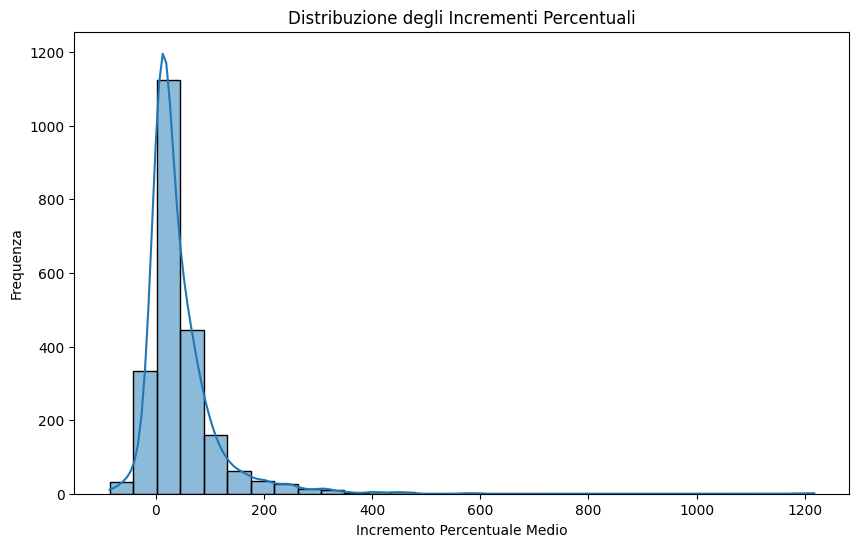

In [ ]:
# Calcola la distribuzione degli incrementi percentuali
plt.figure(figsize=(10, 6))
sns.histplot(incremento_percentuale_medio['incremento_percentuale'], bins=30, kde=True)
plt.title('Distribuzione degli Incrementi Percentuali')
plt.xlabel('Incremento Percentuale Medio')
plt.ylabel('Frequenza')
plt.show()

In [ ]:
# Statistiche descrittive
descr = incremento_percentuale_medio['incremento_percentuale'].describe()
print(descr)

count    2253.000000
mean       43.385592
std        67.205956
min       -85.714286
25%         7.958075
50%        23.703704
75%        60.000000
max      1217.488739
Name: incremento_percentuale, dtype: float64


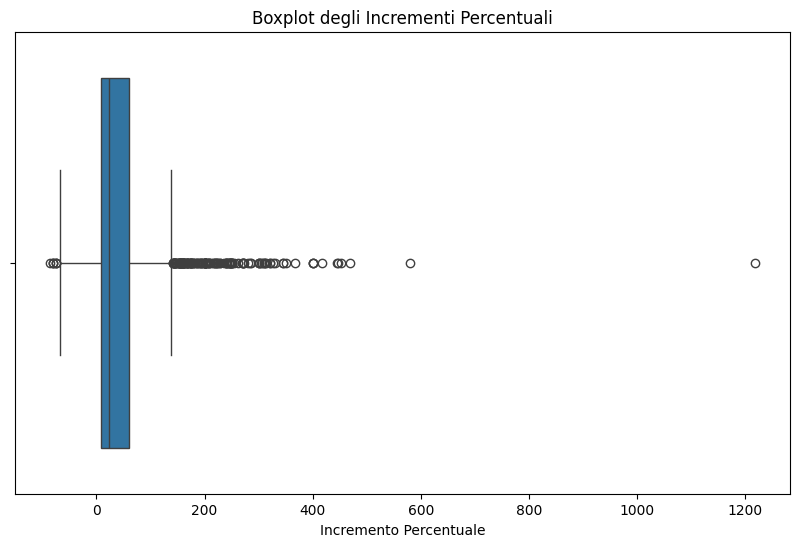

In [ ]:
# Boxplot per identificare outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=incremento_percentuale_medio['incremento_percentuale'])
plt.title('Boxplot degli Incrementi Percentuali')
plt.xlabel('Incremento Percentuale')
plt.show()

In [ ]:
# TODO: dobbiamo identificare anche il decremento?

def classify_increment(value):
    constat_increment = 5 
    low_increment = 15
    medium_increment = 40


    if value <= constat_increment:
        return 'constant_increment'
    elif value <= low_increment:
        return 'low_increment'
    elif value <= medium_increment:
        return 'medium_increment'
    elif value > medium_increment:
        return 'high_increment'
    else:
        return 'decrement'

In [ ]:
incremento_percentuale_medio['incremento_teleassistenze'] = incremento_percentuale_medio['incremento_percentuale'].apply(classify_increment)

In [ ]:
incremento_percentuale_medio.sort_values(by=['incremento_percentuale'], ascending=False)

,quadrimestre,tipologia_professionista_sanitario,tipologia_struttura_erogazione,descrizione_attivita,incremento_percentuale,incremento_teleassistenze
61,1,Infermiere,Azienda Ospedaliera,Educazione del paziente alla raccolta di espet...,1217.488739,high_increment
535,1,Ostetrica/o,IRCCS privato,Intervento di educazione e prevenzione in ambi...,579.629630,high_increment
248,1,Infermiere,Fondazione IRCCS,Informazioni sulle diverse modalità di rilevaz...,468.181818,high_increment
17,1,Dietista,Fondazione IRCCS,Indagine alimentare (colloquio per rilevare ab...,451.648352,high_increment
570,1,Psicologo,Policlinico universitario privato,Psicoterapia individuale,446.358543,high_increment
...,...,...,...,...,...,...
1991,4,Infermiere,Ente di Ricerca,Supporto ed educazione alle medicazioni / bend...,NaN,decrement
1992,4,Infermiere,Ente di Ricerca,"Valutazione del livello di conoscenze, delle c...",NaN,decrement
1993,4,Infermiere,Ente di Ricerca,Valutazione della durata e della qualità del r...,NaN,decrement
2312,4,Podologo,Ente di Ricerca,Intervento di riabilitazione,NaN,decrement


In [ ]:
# df['incremento_teleassistenze'] = df.apply(lambda x: incremento_percentuale_medio.loc[(incremento_percentuale_medio['regione_erogazione'] == x['regione_erogazione']) & (incremento_percentuale_medio['quadrimestre'] == x['quadrimestre'])]['incremento_teleassistenze'].values[0], axis=1)

my_col = ['quadrimestre', 'regione_residenza']

df['incremento_teleassistenze'] = df.apply(lambda x: incremento_percentuale_medio.loc[
    (incremento_percentuale_medio[my_col] == x[my_col].values).all(axis=1)
]['incremento_teleassistenze'].values[0], axis=1)



In [ ]:
df


,id_prenotazione,id_paziente,data_nascita,sesso,regione_residenza,asl_residenza,provincia_residenza,comune_residenza,tipologia_servizio,descrizione_attivita,...,codice_struttura_erogazione,tipologia_struttura_erogazione,id_professionista_sanitario,tipologia_professionista_sanitario,data_erogazione,durata_erogazione_min,eta,anno,quadrimestre,incremento_teleassistenze
0,JUOCPQCUG1H96QO,LCWFXF28X79P382V,1980-04-24 00:00:00+00:00,male,Piemonte,CN1,Cuneo,Fossano,Teleassistenza,Insegnamento al paziente e/o alla sua famiglia...,...,10906,Azienda Ospedaliera,MZRAER00D13A287J,Infermiere,2019-02-04 10:00:00+00:00,2925.0,44,2019,1,medium_increment
1,XDP99NXRHPOYFYU,LRFZOI94E58U012I,1972-01-30 00:00:00+00:00,female,Toscana,AZIENDA USL TOSCANA CENTRO,Firenze,Calenzano,Teleassistenza,Prestazione infermieristica connessa alla nece...,...,90904,Azienda Ospedaliera Universitaria,EBCRPU12T24U316I,Infermiere,2019-02-01 10:00:00+00:00,1895.0,52,2019,1,medium_increment
2,6VYI0AK57ECO5WU,JOBCGJ98A04B765H,1986-06-27 00:00:00+00:00,male,Emilia romagna,AZIENDA USL BOLOGNA,Bologna,Bologna,Teleassistenza,Prestazione dietistica,...,80053,Ospedale a gestione diretta,PMEJNL62M27F357I,Dietista,2019-02-03 06:00:00+00:00,1165.0,38,2019,1,high_increment
3,VLFS5J9E3Q74Q2W,TKROSE51Z77Q065E,1967-10-21 00:00:00+00:00,female,Campania,A.S.L. NAPOLI 1 CENTRO,Napoli,Napoli,Teleassistenza,Psicoterapia individuale,...,150902,Azienda Ospedaliera,VNNRMQ15C69W200K,Psicologo,2019-02-01 06:00:00+00:00,1969.0,56,2019,1,high_increment
4,XD8SZX9JOVCMEXW,WRRVSK73Z45L640S,1963-08-24 00:00:00+00:00,male,Abruzzo,PESCARA,Pescara,Pescara,Teleassistenza,Prestazione dietistica,...,130018,Ospedale a gestione diretta,GIQCNR34T04P154U,Dietista,2019-02-05 14:00:00+00:00,3099.0,61,2019,1,high_increment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484286,NWGQXYJLAZTSXK5,PHBJZU46U44B472M,1979-08-09 00:00:00+00:00,male,Calabria,A.S.P. COSENZA,Cosenza,Montalto Uffugo,Teleassistenza,Addestramento del paziente e/o famiglia in cas...,...,180010,Ospedale a gestione diretta,LDOGNN68P28V217R,Infermiere,2022-12-30 14:00:00+00:00,2388.0,45,2022,4,low_increment
484287,HIQTBNMIKME07RG,IINZRZ57L35P744I,1961-05-26 00:00:00+00:00,female,Lombardia,ATS DELL'INSUBRIA,Varese,Somma Lombardo,Teleassistenza,Prestazione infermieristica relativa alla funz...,...,30901,Ospedale a gestione diretta,QJRGNR36W85W322L,Infermiere,2022-12-31 13:00:00+00:00,1524.0,63,2022,4,medium_increment
484288,I9L0K7HGMZDMXQ9,QAKHUY72D19M465N,2014-10-31 00:00:00+00:00,male,Puglia,ASL FG,Foggia,Foggia,Teleassistenza,Intervento fisioterapico,...,160905,Fondazione IRCCS,LUSQEC01O34D921X,Fisioterapista,2022-12-30 17:00:00+00:00,3081.0,9,2022,4,high_increment
484289,UAMI5JIJUN80FOK,OOUVZJ15J93N500X,2011-08-18 00:00:00+00:00,female,Campania,A.S.L. NAPOLI 1 CENTRO,Napoli,Napoli,Teleassistenza,Intervento di educazione e prevenzione in ambi...,...,150903,Azienda Ospedaliera,EZXYPG62R63K538T,Ostetrica/o,2022-12-31 15:00:00+00:00,2279.0,12,2022,4,low_increment


# COSE A CASO
### da vedere dopo

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import OneHotEncoder
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
grouped.columns

Index(['anno', 'quadrimestre', 'tipologia_professionista_sanitario',
       'tipologia_struttura_erogazione', 'descrizione_attivita', 'num_servizi',
       'incremento', 'incremento_percentuale'],
      dtype='object')

In [ ]:
df.shape

In [ ]:
categorical_cols = ['id_prenotazione', 'id_paziente', 'sesso',
       'regione_residenza', 'asl_residenza', 'provincia_residenza',
       'comune_residenza', 'tipologia_servizio', 'descrizione_attivita', 'regione_erogazione', 'asl_erogazione',
       'provincia_erogazione', 'struttura_erogazione', 'tipologia_struttura_erogazione',
        'tipologia_professionista_sanitario', 'incremento_teleassistenze']

In [ ]:
# One-Hot Encoding
encoder = OneHotEncoder(drop='first')  # drop='first' per evitare multicollinearità
encoded_categorical_cols = encoder.fit_transform(df[categorical_cols])

# Converti in DataFrame
encoded_df = pd.DataFrame(encoded_categorical_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Unisci con le colonne numeriche (come 'eta')
X = pd.concat([encoded_df, df[['eta']]], axis=1)

: 